# 📝 Exercise M5.01

In the previous notebook, we showed how a tree with 1 level depth works. The
aim of this exercise is to repeat part of the previous experiment for a tree
with 2 levels depth to show how such parameter affects the feature space
partitioning.

We first load the penguins dataset and split it into a training and a testing
sets:

In [1]:
import pandas as pd

penguins = pd.read_csv("../datasets/penguins_classification.csv")
culmen_columns = ["Culmen Length (mm)", "Culmen Depth (mm)"]
target_column = "Species"

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section at the end of this MOOC.</p>
</div>

In [2]:
from sklearn.model_selection import train_test_split

data, target = penguins[culmen_columns], penguins[target_column]
data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=0
)

Create a decision tree classifier with a maximum depth of 2 levels and fit the
training data.

In [3]:
# Write your code here.
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=2)
tree.fit(data_train, target_train)

DecisionTreeClassifier(max_depth=2)

Now plot the data and the decision boundary of the trained classifier to see
the effect of increasing the depth of the tree.

Hint: Use the class `DecisionBoundaryDisplay` from the module
`sklearn.inspection` as shown in previous course notebooks.

<div class="admonition warning alert alert-danger">
<p class="first admonition-title" style="font-weight: bold;">Warning</p>
<p class="last">At this time, it is not possible to use <tt class="docutils literal"><span class="pre">response_method="predict_proba"</span></tt> for
multiclass problems. This is a planned feature for a future version of
scikit-learn. In the mean time, you can use <tt class="docutils literal"><span class="pre">response_method="predict"</span></tt>
instead.</p>
</div>

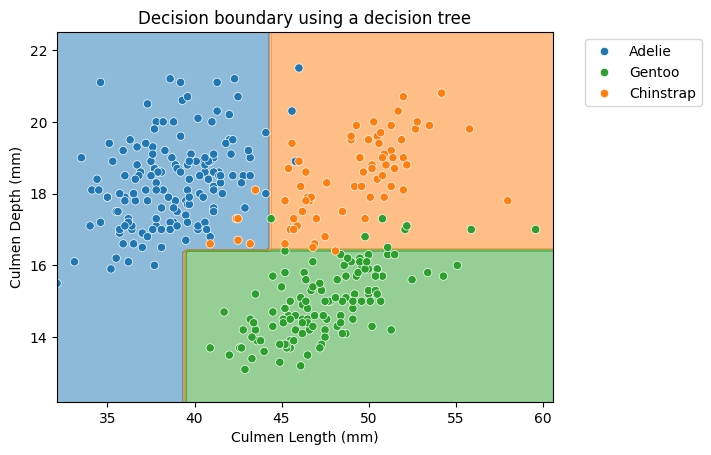

In [7]:
# Write your code here.
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

tab10_norm = mpl.colors.Normalize(vmin=-0.5, vmax=8.5)
# create a palette to be used in the scatterplot
palette = ["tab:blue", "tab:green", "tab:orange"]

DecisionBoundaryDisplay.from_estimator(
    tree,
    data_train,
    response_method="predict",
    cmap="tab10",
    norm=tab10_norm,
    alpha=0.5,
)
sns.scatterplot(
    data=penguins,
    x=culmen_columns[0],
    y=culmen_columns[1],
    hue=target_column,
    palette=palette,
)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
_ = plt.title("Decision boundary using a decision tree")

Did we make use of the feature "Culmen Length"? Plot the tree using the
function `sklearn.tree.plot_tree` to find out!

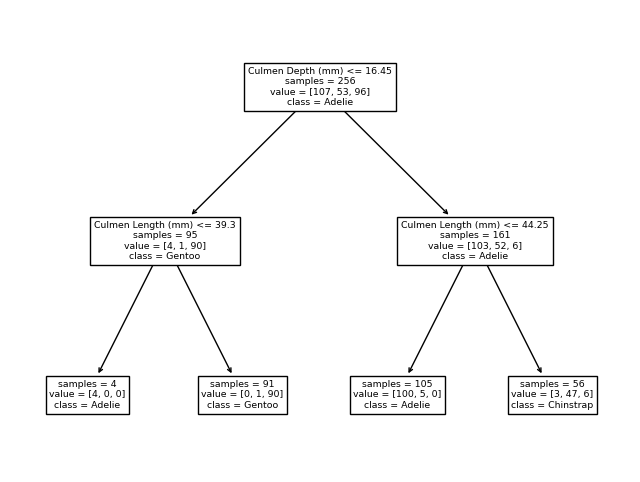

In [8]:
# Write your code here.
from sklearn.tree import plot_tree

_, ax = plt.subplots(figsize=(8, 6))
_ = plot_tree(
    tree,
    feature_names=culmen_columns,
    class_names=tree.classes_.tolist(),
    impurity=False,
    ax=ax,
)

Compute the accuracy of the decision tree on the testing data.

In [9]:
# Write your code here.
test_score = tree.score(data_test, target_test)
print(f"Accuracy of the DecisionTreeClassifier: {test_score:.2f}")

Accuracy of the DecisionTreeClassifier: 0.97
